In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
import numpy as np
from IPython.core.display_functions import display
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
com_file = "./Linear_combination_crossover_normal/combinations_result_baseline.csv"
df_com = pd.read_csv(com_file,header=0)
df_com = df_com[:200]

In [3]:
opt = [0, 0, 0, 0, 0, 0, 0, -418.98 * 10, 0, 0, 0, 0, 0, 1, 0.00030, -1.0316, 0.398, 3, -3.86, -3.32, -10.1532, -10.4028, -10.5363]

In [4]:
file_name = ["Linear_combination_crossover_normal",
             "Linear_combination_crossover_uniform",
            "Probabilistic_crossover_normal",
             "Probabilistic_crossover_uniform",
            # "singe_point_crossover_normal",
             "singe_point_crossover_uniform"]
def read_file(name):
    path = "./"+ name + "/Baseline_table_long_100.csv"
    df1 = pd.read_csv(path,index_col=[0,1],header=0)
    path2 = "./"+ name + "/Baseline_table_long_100_200.csv"
    df2 = pd.read_csv(path2,index_col=[0,1],header=0)
    df1 = pd.concat([df1,df2],axis=1)
    df1.columns = [i for i in range(0,len(df_com))]
    # print(df1)
    df1 = df1.stack()
    df1 = df1.rename_axis(index=["Function", "Times", "Combinations"])
    df1 = df1.reset_index(level=[0, 2], name="Fitness")
    df1 = df1.reset_index(drop=False)
    df1["Type"] = name
    return df1
df = [read_file(name) for name in file_name]
df = pd.concat(df,axis=0)
# print(df)
df[['iterations', 'mutation_rate', 'num_individuals',
    'range_mutation', 'crossover_probability']] = pd.DataFrame(
    [[np.nan, np.nan, np.nan, np.nan, np.nan]], index=df.index)
for i in range(0, len(df_com), 1):
    # print(i)
    df.loc[df['Combinations'] == i, 'iterations'] = df_com.iloc[i, 0]
    df.loc[df['Combinations'] == i, 'mutation_rate'] = df_com.iloc[i, 1]
    df.loc[df['Combinations'] == i, 'num_individuals'] = df_com.iloc[i, 2]
    df.loc[df['Combinations'] == i, 'range_mutation'] = df_com.iloc[i, 3]
    df.loc[df['Combinations'] == i, 'crossover_probability'] = df_com.iloc[i, 4]
df["Fitness"] = df["Fitness"].astype("float64")
display(df)

,Times,Function,Combinations,Fitness,Type,iterations,mutation_rate,num_individuals,range_mutation,crossover_probability
0,Times1,F1,0,0.0000,Linear_combination_crossover_normal,1000000.0000,0.1000,100.0000,0.0100,0.5000
1,Times1,F1,1,0.0000,Linear_combination_crossover_normal,1000000.0000,0.1000,100.0000,0.0100,0.6000
2,Times1,F1,2,0.0000,Linear_combination_crossover_normal,1000000.0000,0.1000,100.0000,0.0100,0.7000
3,Times1,F1,3,0.0000,Linear_combination_crossover_normal,1000000.0000,0.1000,100.0000,0.2500,0.5000
4,Times1,F1,4,0.0000,Linear_combination_crossover_normal,1000000.0000,0.1000,100.0000,0.2500,0.6000
...,...,...,...,...,...,...,...,...,...,...
5995,Times10,F22,195,-1.0038,singe_point_crossover_uniform,1000000.0000,2.0000,100.0000,5.0000,0.5000
5996,Times10,F22,196,-1.2638,singe_point_crossover_uniform,1000000.0000,2.0000,100.0000,5.0000,0.6000
5997,Times10,F22,197,-1.5521,singe_point_crossover_uniform,1000000.0000,2.0000,100.0000,5.0000,0.7000
5998,Times10,F22,198,-10.4020,singe_point_crossover_uniform,1000000.0000,2.0000,200.0000,0.0100,0.5000


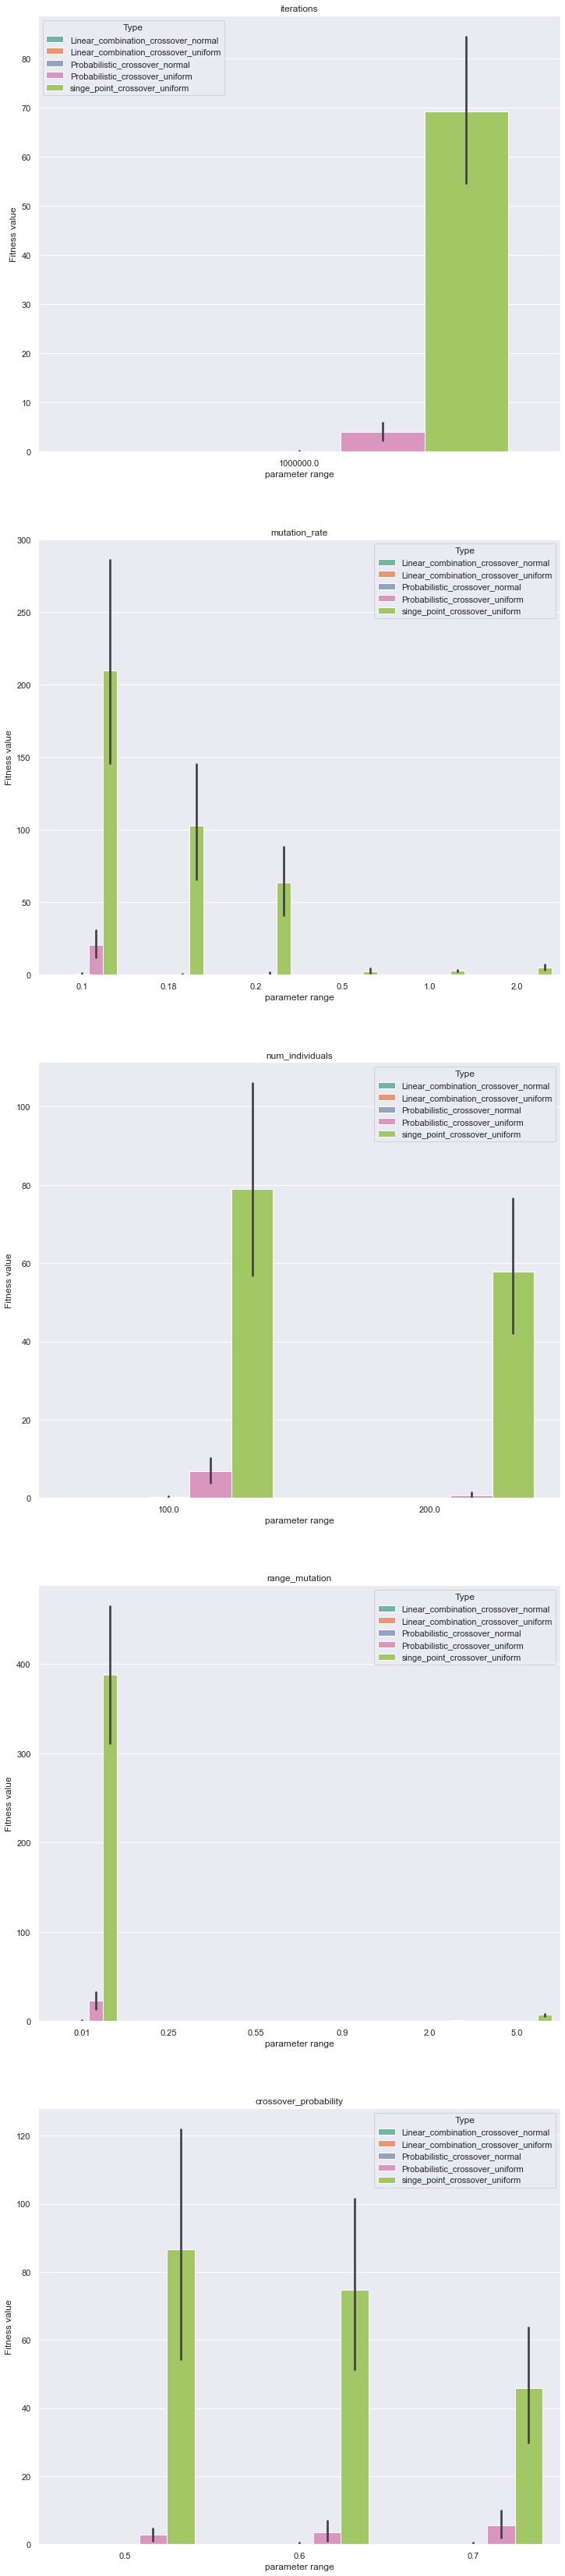

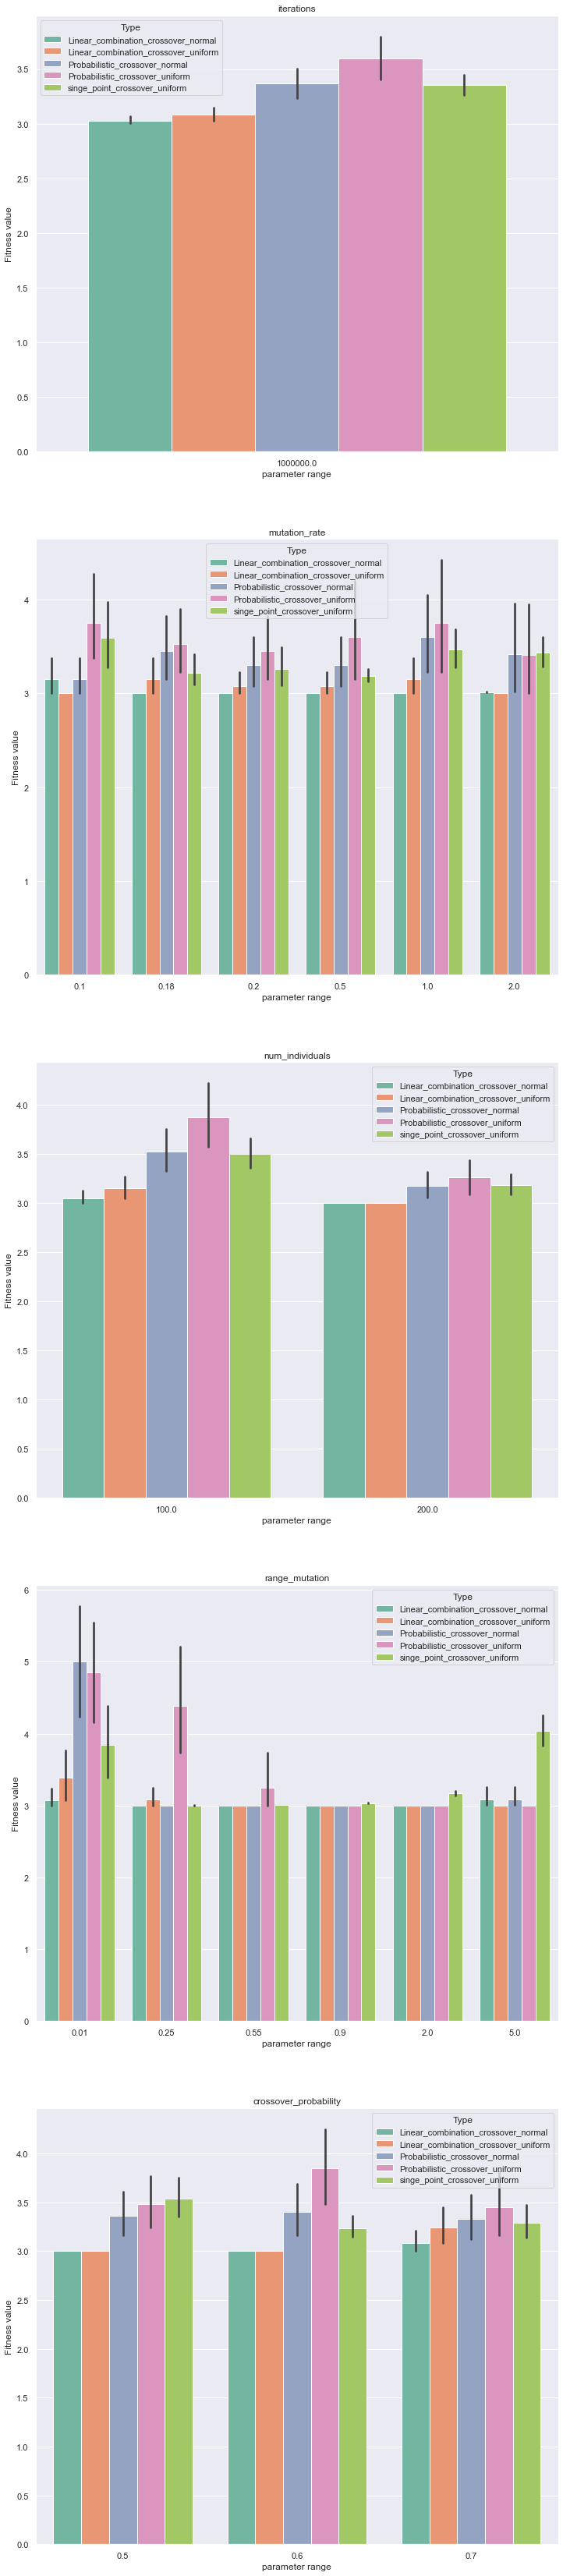

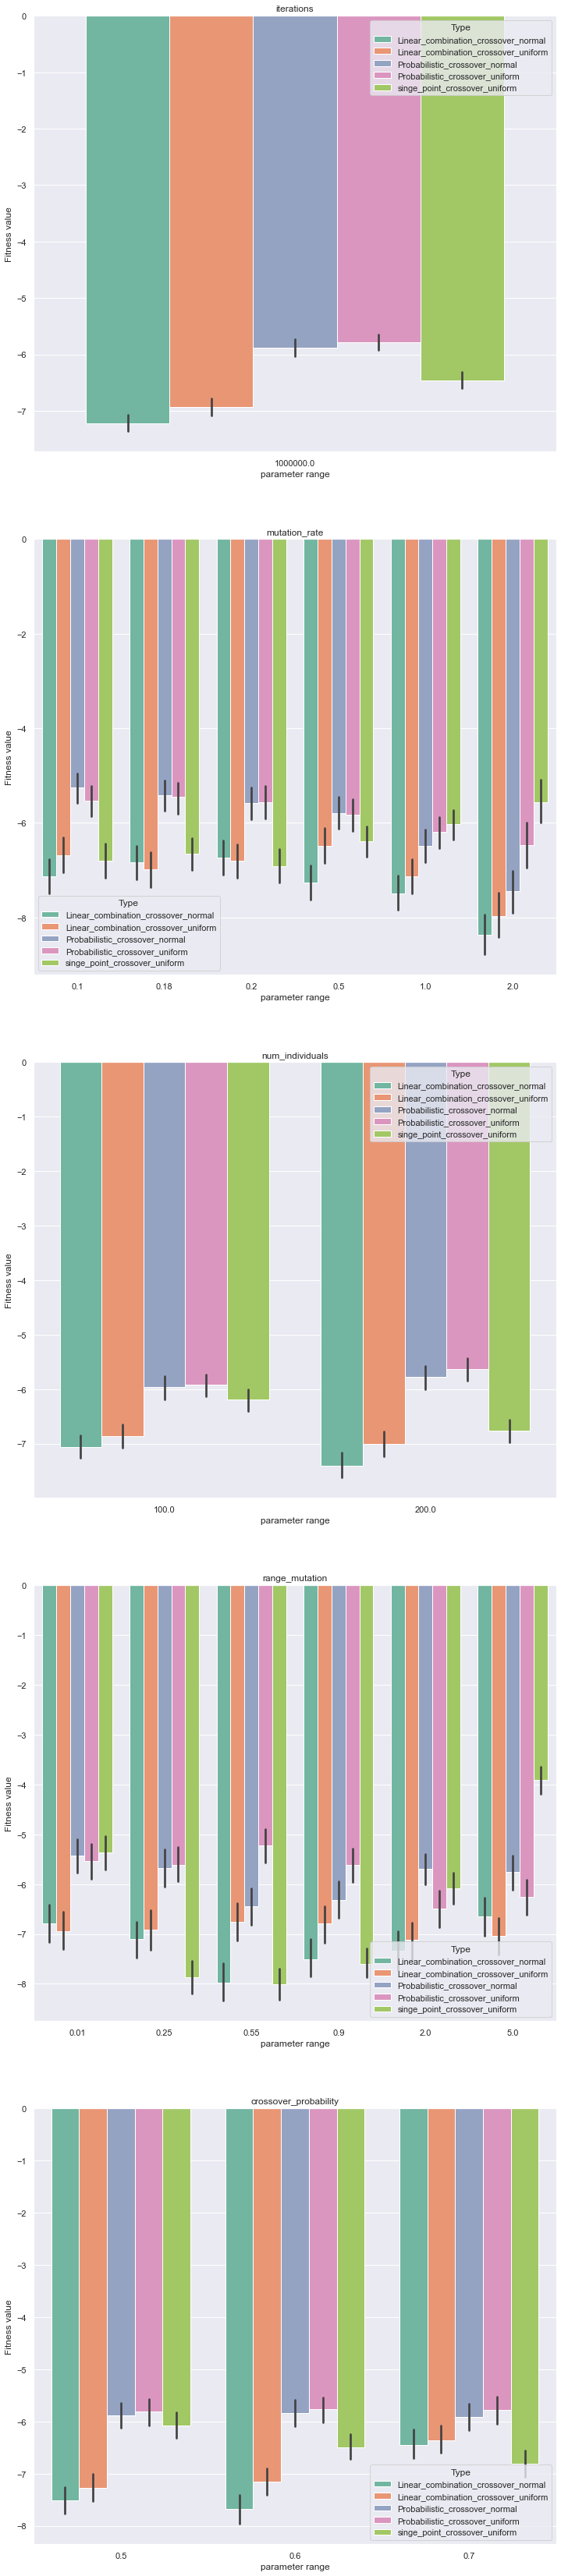

In [5]:
def show_graph(df, lst, f):
    sns.set()
    dist_cols = 1
    dist_rows = 6
    plt.figure(figsize=(12*dist_cols,12*dist_rows))
    i=1
    for k in range(len(lst)):
        ax = plt.subplot(dist_rows,dist_cols,i)
        # ax = sns.violinplot(x=lst[k], y="Fitness",hue="Type",data=df,ax=ax, margin_titles=True, palette="Set2",legend=True, dodge=True, inner="quartile")
        ax = sns.barplot(x=lst[k], y="Fitness",hue="Type",data=df,palette="Set2")
        ax.set_ylabel("Fitness value")
        ax.set_xlabel("parameter range")
        ax.set_title(lst[k])
        i=i+1
    plt.savefig('barplot_F{0}.pdf'.format(f), dpi=1000)
    plt.show()

cols = ["iterations",'mutation_rate','num_individuals',"range_mutation",'crossover_probability']

for i in [1,18,22]:
    cond = df["Function"] == "F" + str(i)
    show_graph(df=df[cond], lst=cols, f=i)